In [7]:
import re
import os
import sys
import datetime
import itertools
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.figsize'] = (10, 4)
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.model_selection import TimeSeriesSplit
from scipy.optimize import minimize 
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error

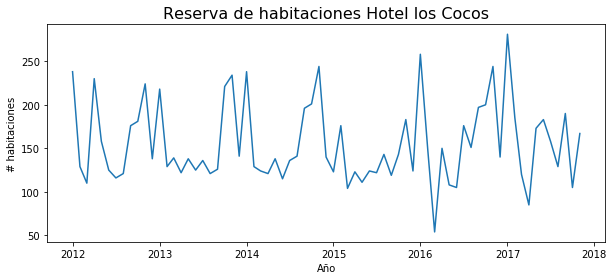

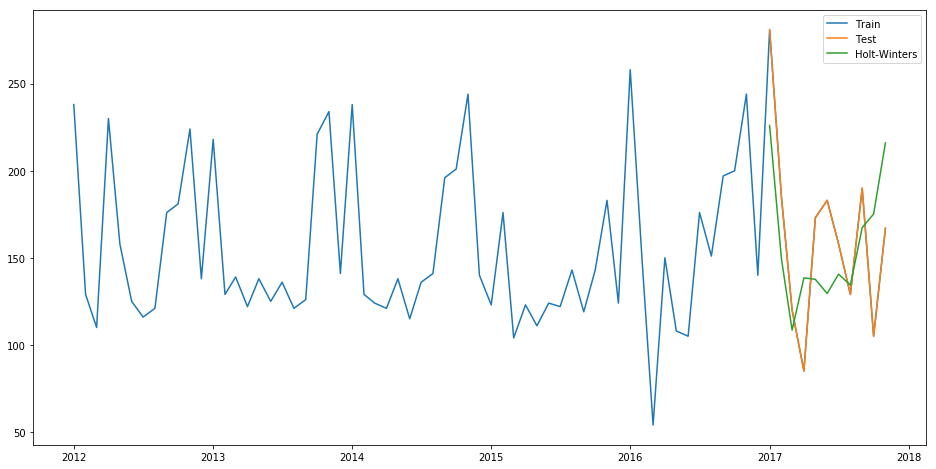

In [39]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#leer la data del excel de los huespedes.csv
data = pd.read_csv('./data/hotelguests.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)
plt.plot(data)
plt.title('Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel('# habitaciones')
plt.xlabel('Año')
plt.savefig('./img/serie_huespedes.png')
plt.show()
y_train = data[:'2017']
y_test = data['2017':]
model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=12).fit()
pred = model.predict(start=y_test.index[0], end=y_test.index[-1])
plt.figure(figsize=(16,8))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()


In [38]:
#MSE
rms = sqrt(mean_squared_error(y_test, pred))
print('MSE',rms)
#MADE
#print(y_test)
#print(pred)
real=np.array(y_test)
print(real)
predi=np.array(pred)
print(predi)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    #print(y_true-y_pred,"\n")
    #print(y_true,"\n")
    #print(y_pred,"\n")
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#MAPE=mean_absolute_percentage_error(y_test, pred)
#print('MAPE' , MAPE)



MSE 34.954306474560894
[[281]
 [185]
 [120]
 [ 85]
 [173]
 [183]
 [158]
 [129]
 [190]
 [105]
 [167]]
[217.25    151.50046 156.50001 112.24936 140.25196 165.751   150.24921
 181.49861 153.25185 129.49432 160.50075]
